In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv('D:/Downloads/Week/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
df.shape

(200, 5)

In [65]:
df=df.drop('CustomerID',axis=True)

In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [69]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=False)

In [39]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


In [70]:


scalar=StandardScaler()
df_scaled=scalar.fit_transform(df)

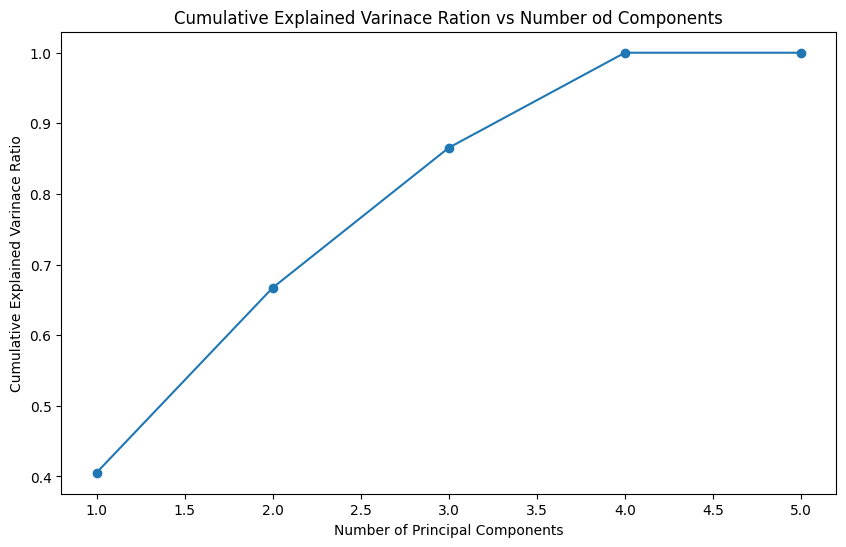

In [71]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_scaled)
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_varinace_ratio=np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10,6))
plt.plot(range(1,len(cumulative_varinace_ratio)+1),cumulative_varinace_ratio,marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Varinace Ratio')
plt.title('Cumulative Explained Varinace Ration vs Number od Components')
plt.show()

In [112]:
pca=PCA(n_components=3)
df_pca=pd.DataFrame(pca.fit_transform(df_scaled))
print(pca.components_)

[[-0.11855625 -0.07390773  0.11585755  0.69536289 -0.69536289]
 [-0.69484399  0.0910454   0.69546061 -0.11233235  0.11233235]
 [ 0.05058487  0.99308209 -0.05942693  0.06203858 -0.06203858]]


In [73]:
df_pca.head()

,0,1,2
0,-1.321908,0.782594,-1.913170
1,-1.150019,1.816813,-2.002805
2,1.320033,-0.607360,-1.545541
3,1.613849,1.159959,-1.698450
4,1.376544,-0.234457,-1.546142


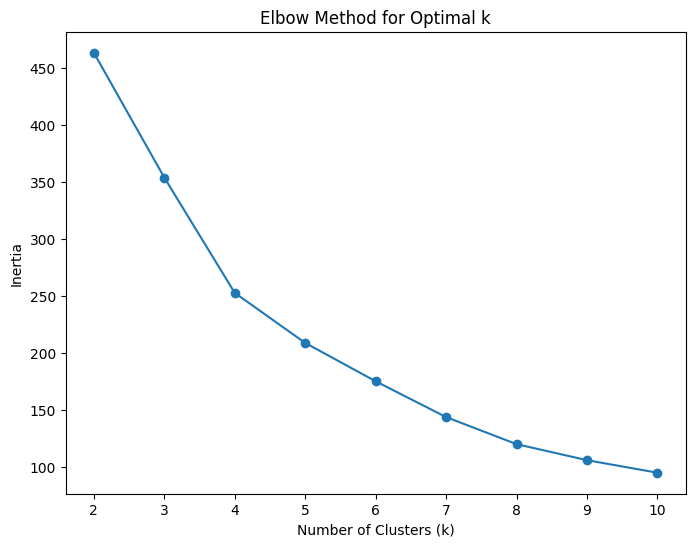

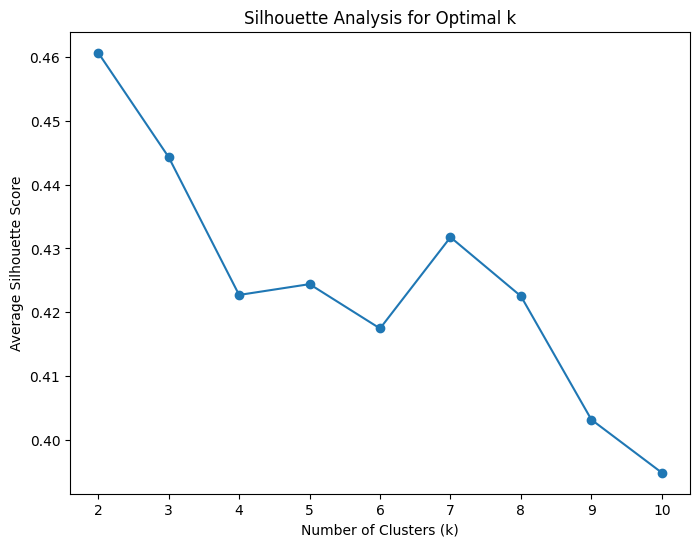

In [86]:
inertia=[]
silhouette_scores=[]
k_values=range(2,11)
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca,kmeans.labels_))
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

In [113]:

k = 4

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_pca)


In [114]:
cluster_profiles = df.groupby('cluster').agg({
    'Age': ['mean', 'median'],
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median'],
    
})
print(cluster_profiles)

               Age        Annual Income (k$)        Spending Score (1-100)  \
              mean median               mean median                   mean   
cluster                                                                      
0        49.437500   48.5          62.416667   62.5              29.208333   
1        28.392857   29.5          60.428571   62.5              68.178571   
2        47.803571   48.0          58.071429   55.5              34.875000   
3        28.250000   28.0          62.000000   63.0              71.675000   

                
        median  
cluster         
0         32.0  
1         73.0  
2         39.5  
3         73.0  


In [104]:
label_map = {
    0: 'Adult People- Less Income -Less Spending',
    1: 'Adult People- Medium Income -Average Spending',
    2: 'Adult People- HIgh Income -High Spending',
    3: 'Adult People- High Income -Less Spending',
    4: 'Young People- Less Income -High Spending',
}
df['cluster_label'] = df['cluster'].map(label_map)


In [115]:
X = df.drop(['cluster', 'cluster_label'], axis=1)
y = df[['cluster']]


In [116]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline



In [133]:
pipeline={
    'KNN':Pipeline([
      
        ('classifier',KNeighborsClassifier())
    ]),
    'Decsion tree':Pipeline([
        
        ('classifier',DecisionTreeClassifier(max_depth=5,random_state=42, splitter='random',criterion='entropy'))
    
    ]),
    'Naive Byes':Pipeline([
    
        ('classifier',GaussianNB(var_smoothing=1e-8))
    ])
}

In [140]:

from sklearn.model_selection import GridSearchCV



param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9,11,13,15],
        'classifier__weights': ['distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']

    },
    'Decsion tree': {
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random']
    },
    'Naive Byes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}

In [141]:
results=[]
for name in pipeline:
    grid = GridSearchCV(pipeline[name], param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    cv_acc = grid.best_score_
    
    results.append((name, train_acc, test_acc, cv_acc, grid.best_params_))

# Create a result DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "CV Accuracy", "Best Params"])
results_df.sort_values(by="CV Accuracy", ascending=False, inplace=True)

print(results_df)

d:\Downloads\Week\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


          Model  Train Accuracy  Test Accuracy  CV Accuracy  \
2    Naive Byes        0.992857       0.983333     0.992857   
1  Decsion tree        1.000000       0.950000     0.978571   
0           KNN        1.000000       0.716667     0.657143   

                                         Best Params  
2               {'classifier__var_smoothing': 1e-09}  
1  {'classifier__criterion': 'gini', 'classifier_...  
0  {'classifier__metric': 'manhattan', 'classifie...  


d:\Downloads\Week\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
